# Rotating Coild Data Analysis for BO QD Magnets

## Import libraries and Load measurement data

In [1]:
import sys
import numpy as np
import matplotlib
matplotlib.use('Qt5Agg')

%matplotlib notebook

import matplotlib.pyplot as plt
from lnls.rotcoil import *

In [2]:
# Define serial numbers, one for each magnet

serials_qd = [
    '001', '002', 
    '003', # different max current
    '004', '005', '006', '007', '008', '009', '010', 
    '011', '012', '013', '014', '015', '016', 
    '017', # high rotation error at 2A
    '018', '019', '021', 
    '022', '023', '024', '026', '027', 
]

serials_unused = [
    '020',
]

serials = sorted(serials_qd + serials_unused)

# Load all data
RotCoilMeas_BOQuadQD.family_folder = ''
data = MagnetsAnalysis(RotCoilMeas_BOQuadQD, serials)
data.init()

# Print info
data.print_info()

index: 00, serial_number: 001, data sets: ['M2', 'M1', 'M3']
index: 01, serial_number: 002, data sets: ['M2', 'M1', 'M3']
index: 02, serial_number: 003, data sets: ['M2', 'M1', 'M3']
index: 03, serial_number: 004, data sets: ['M2', 'M1', 'M3']
index: 04, serial_number: 005, data sets: ['M2', 'M1', 'M3']
index: 05, serial_number: 006, data sets: ['M2', 'M1', 'M3']
index: 06, serial_number: 007, data sets: ['M2', 'M1', 'M3']
index: 07, serial_number: 008, data sets: ['M2', 'M1', 'M3']
index: 08, serial_number: 009, data sets: ['M2', 'M1', 'M3']
index: 09, serial_number: 010, data sets: ['M2', 'M1', 'M3']
index: 10, serial_number: 011, data sets: ['M2', 'M1', 'M3']
index: 11, serial_number: 012, data sets: ['M2', 'M1', 'M3']
index: 12, serial_number: 013, data sets: ['M2', 'M1', 'M3']
index: 13, serial_number: 014, data sets: ['M2', 'M1', 'M3']
index: 14, serial_number: 015, data sets: ['M2', 'M1', 'M3']
index: 15, serial_number: 016, data sets: ['M2', 'M1', 'M3']
index: 16, serial_number

## Maximum Integrated Quadrupole

In [3]:
# gets integrated strength at maximum current for all magnets
data.main_intmpole_at_max_current('M1')

index:00, serial:001, idx:07, max_current:   +31.9731 [A], diff_spec: +0.77 [%]
index:01, serial:002, idx:07, max_current:   +31.9846 [A], diff_spec: +0.72 [%]
index:02, serial:003, idx:07, max_current:   +29.9598 [A], diff_spec: -5.57 [%]
index:03, serial:004, idx:07, max_current:   +31.9719 [A], diff_spec: +0.70 [%]
index:04, serial:005, idx:07, max_current:   +31.9695 [A], diff_spec: +0.69 [%]
index:05, serial:006, idx:07, max_current:   +31.9788 [A], diff_spec: +1.08 [%]
index:06, serial:007, idx:07, max_current:   +31.9662 [A], diff_spec: +0.86 [%]
index:07, serial:008, idx:07, max_current:   +31.9696 [A], diff_spec: +0.86 [%]
index:08, serial:009, idx:07, max_current:   +31.9691 [A], diff_spec: +0.80 [%]
index:09, serial:010, idx:07, max_current:   +31.9641 [A], diff_spec: +0.83 [%]
index:10, serial:011, idx:07, max_current:   +31.9606 [A], diff_spec: +0.73 [%]
index:11, serial:012, idx:07, max_current:   +31.9734 [A], diff_spec: +0.72 [%]
index:12, serial:013, idx:07, max_curren

<IPython.core.display.Javascript object>


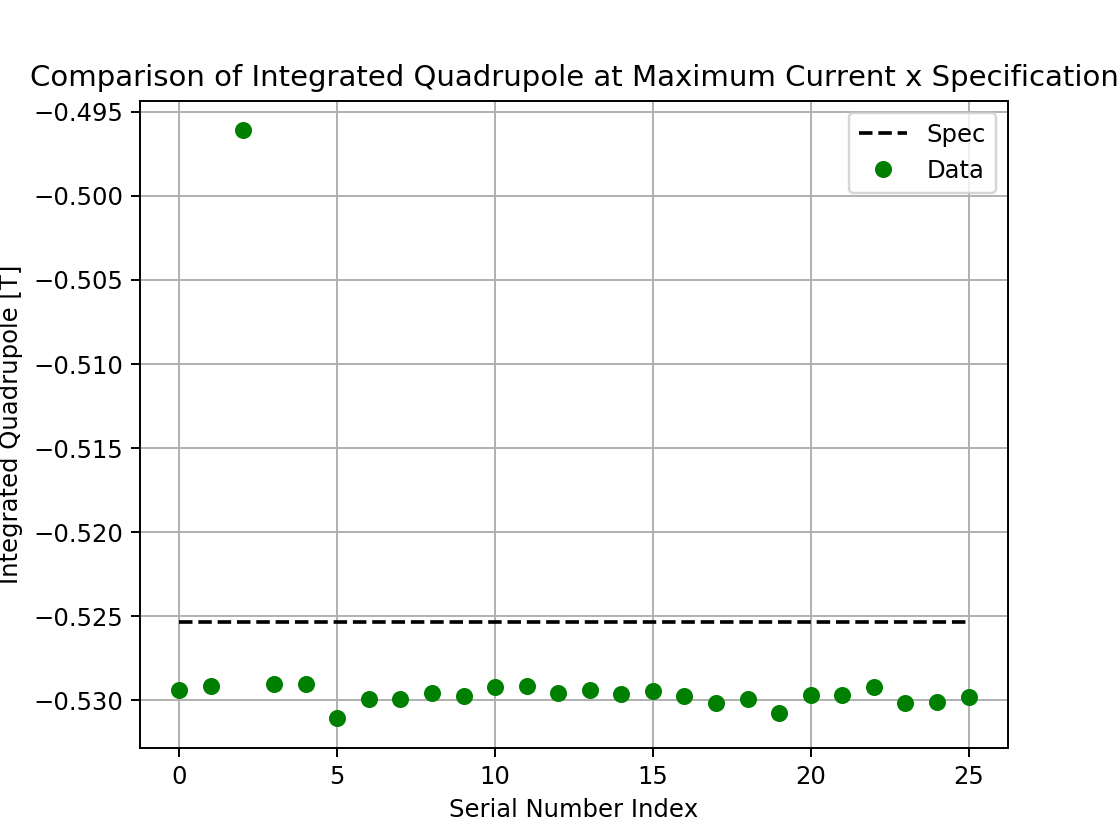

In [13]:
# plot data comparison with spec
plt.figure()
data.main_intmpole_at_max_current_plot(plt)
plt.show()

## Magnetic Center

<IPython.core.display.Javascript object>


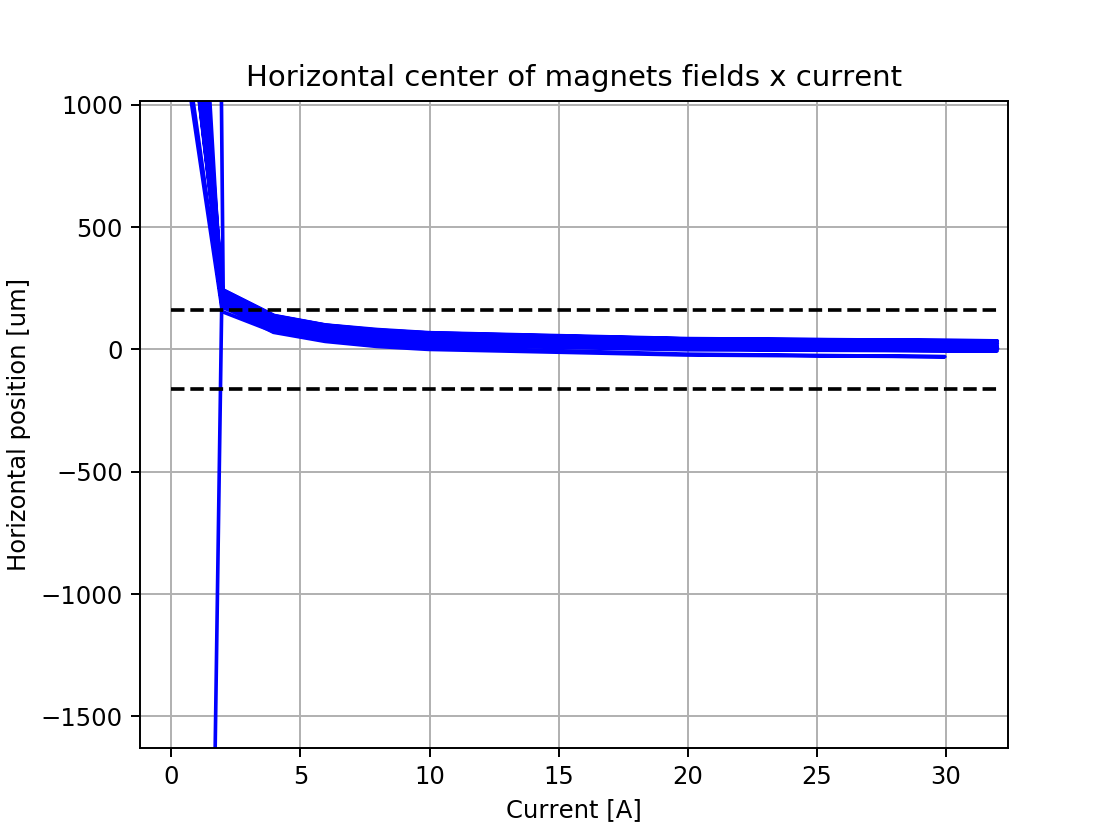

Horizontal center at maximum current [um]: +12.96 ± 14.25


<IPython.core.display.Javascript object>


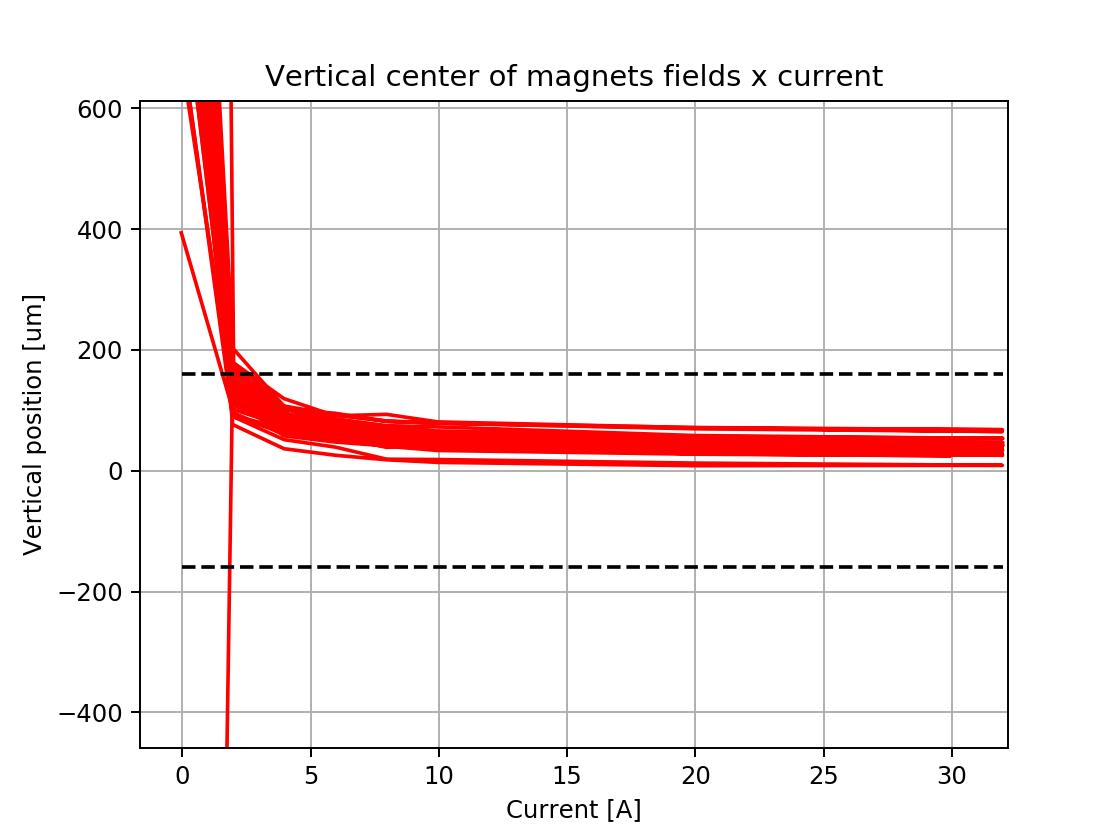

Vertical center at maximum current [um]: +40.60 ± 12.40


In [4]:
# Horizontal center for all magnets x currents
plt.figure()
data.magnetic_center_direction_plot('M1', 'X', plt)
plt.show()

# Vertical center for all magnets y currents
plt.figure()
data.magnetic_center_direction_plot('M1', 'Y', plt)
plt.show()

<IPython.core.display.Javascript object>


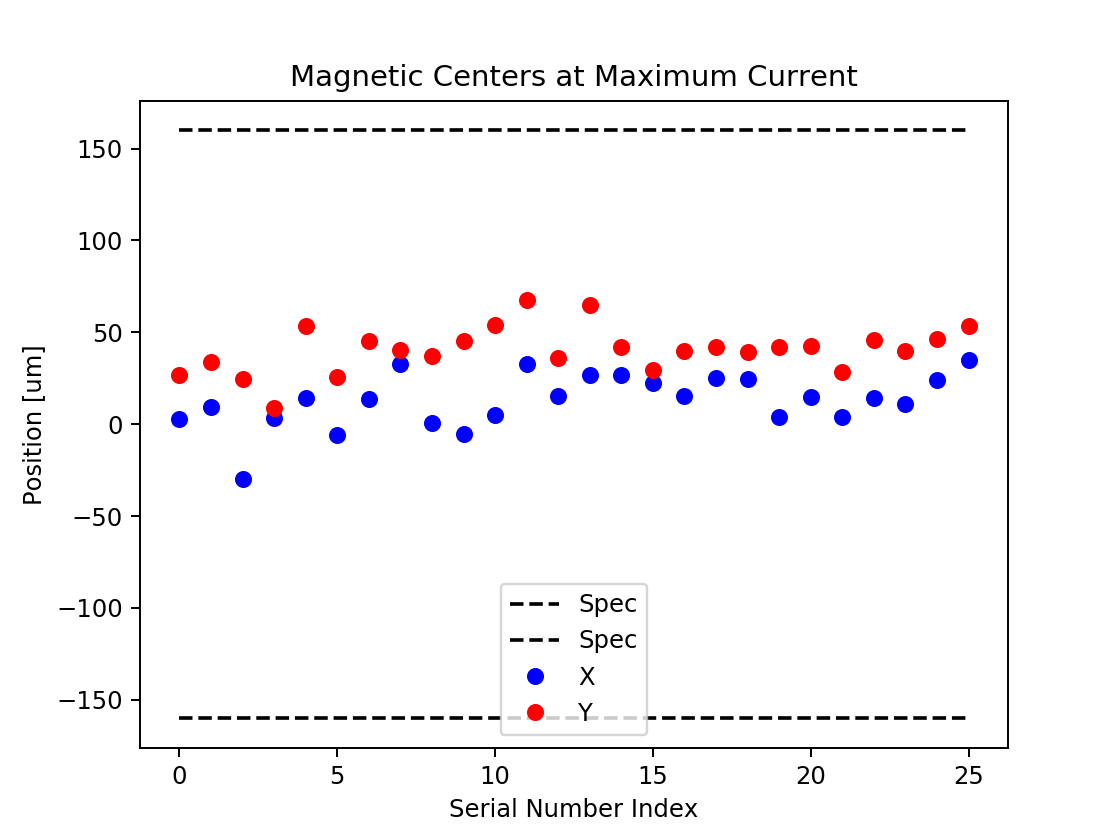

<IPython.core.display.Javascript object>


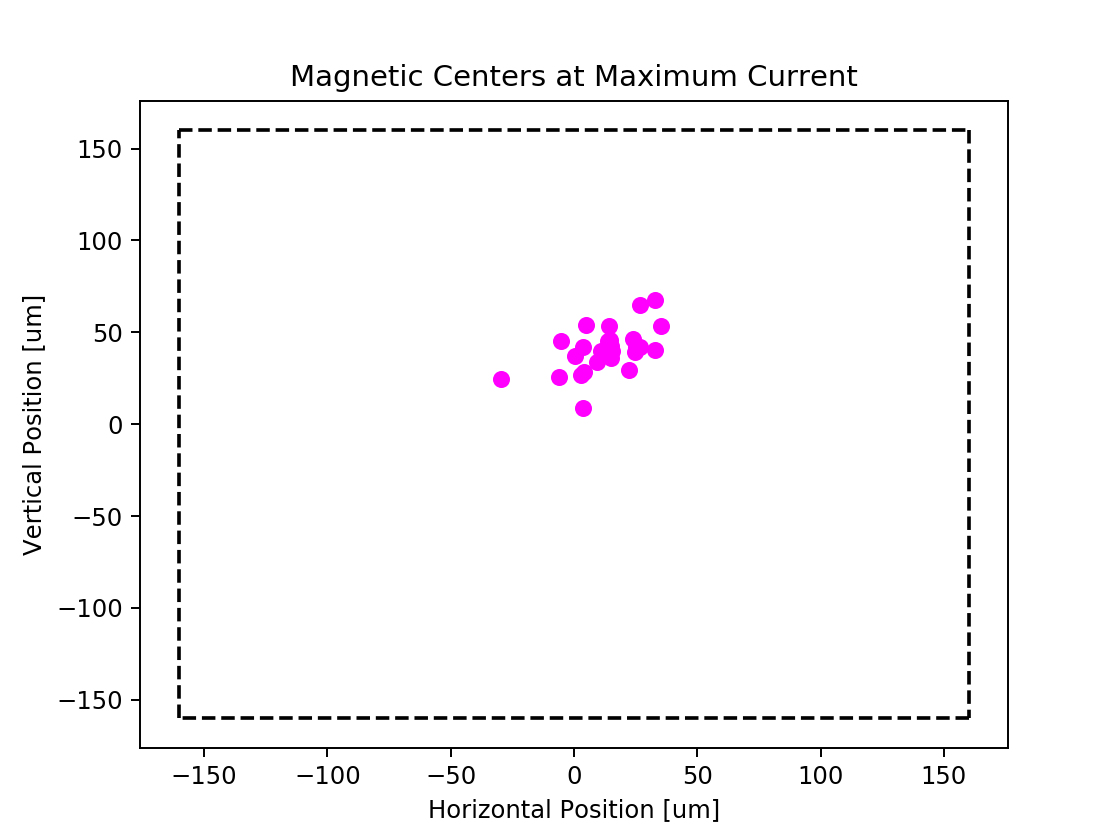

In [5]:
# Horizontal and vertical positions of all magnets
plt.figure()
data.magnetic_center_plot('M1', plt)
plt.show()

# Transverse plane positions
plt.figure()
data.magnetic_center_transverse_plot('M1', plt)
plt.show()

## Ramp Up

<IPython.core.display.Javascript object>


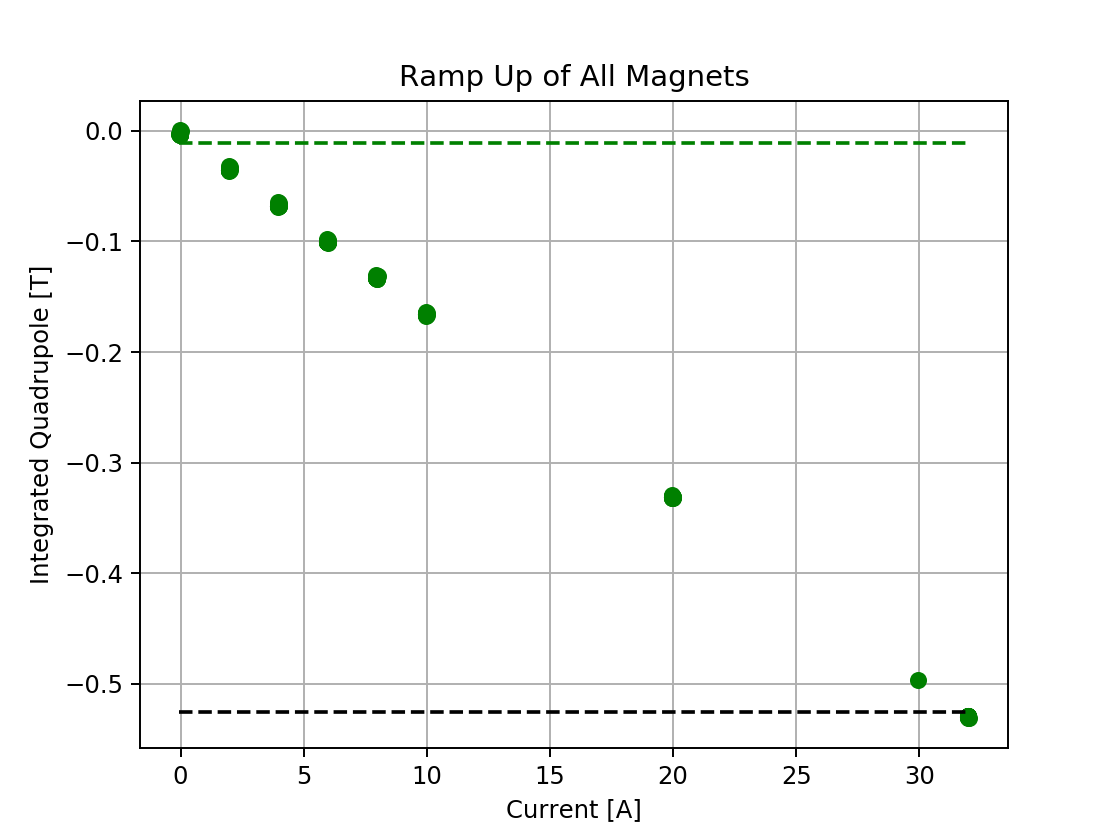

Nominal Integrated Quadrupole [T]:
BO-Fam:MA-QD    : -0.011206

BO-Fam:MA-QD   : 000.5 A


In [6]:
# Plot rampup integrated strength of main multipole and compare it to nominal values and maximum spec

plt.figure()
data.rampup_excitation_curve_plot('M1', plt)
plt.show()

# Print currents for nominal strengths
print()
d = data.tmpl.get_nominal_main_intmpole_values(3.0)
for fam, gl in d.items():
    c = data.tmpl.rampup_main_mpole_2_curr('M1', gl)
    print('{:<15s}: {:05.1f} A'.format(fam, c))

<IPython.core.display.Javascript object>


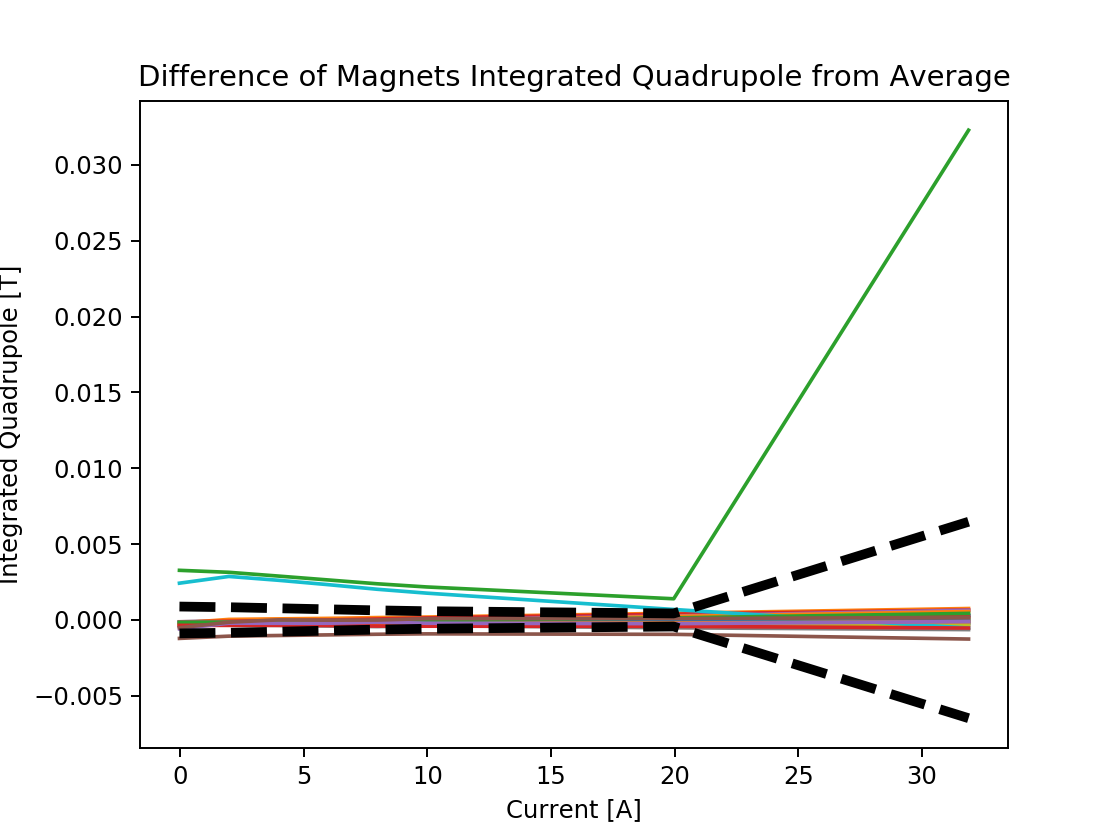

(26, 8)


In [17]:
# Plot rampup dispersion amongst magnets

plt.figure()
data.rampup_excitation_curve_dispersion_plot('M1', plt)
plt.show()

In [18]:
# Print random integrated main strength for various currents

data.rampup_excitation_curve_rms_error_print('M1')

current 00:   -0.033 [A], rms_error: 31.8547 [%], max_error: 122.9369 [%]
current 01:   +1.966 [A], rms_error:  2.4037 [%], max_error:  9.3824 [%]
current 02:   +3.965 [A], rms_error:  1.1453 [%], max_error:  4.5103 [%]
current 03:   +5.964 [A], rms_error:  0.7017 [%], max_error:  2.7878 [%]
current 04:   +7.964 [A], rms_error:  0.4767 [%], max_error:  1.9118 [%]
current 05:   +9.964 [A], rms_error:  0.3488 [%], max_error:  1.4077 [%]
current 06:  +19.965 [A], rms_error:  0.1304 [%], max_error:  0.4667 [%]
current 07:  +31.894 [A], rms_error:  1.2257 [%], max_error:  6.1116 [%]


<IPython.core.display.Javascript object>


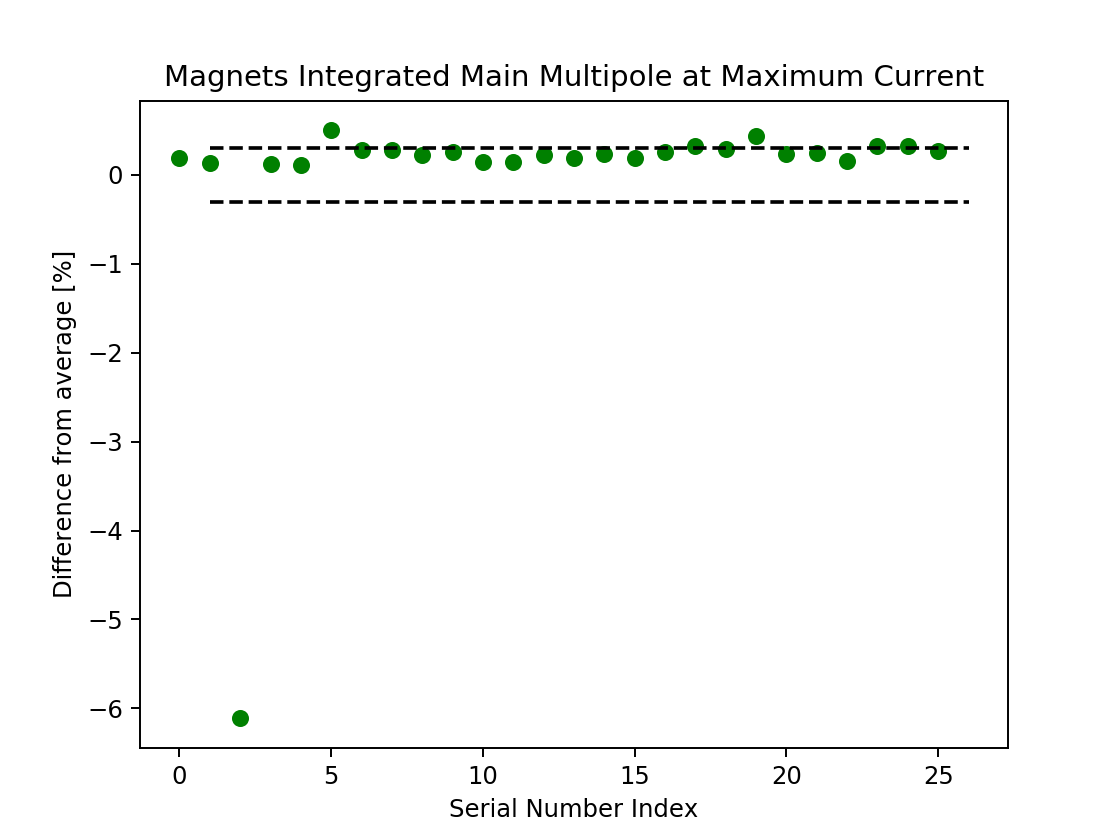

In [19]:
# Plot Integrated Quadrupole Error for maximum current

plt.figure()
data.rampup_excitation_curve_rms_error_plot(plt)
plt.show()

# Gradient Roll Error

<IPython.core.display.Javascript object>


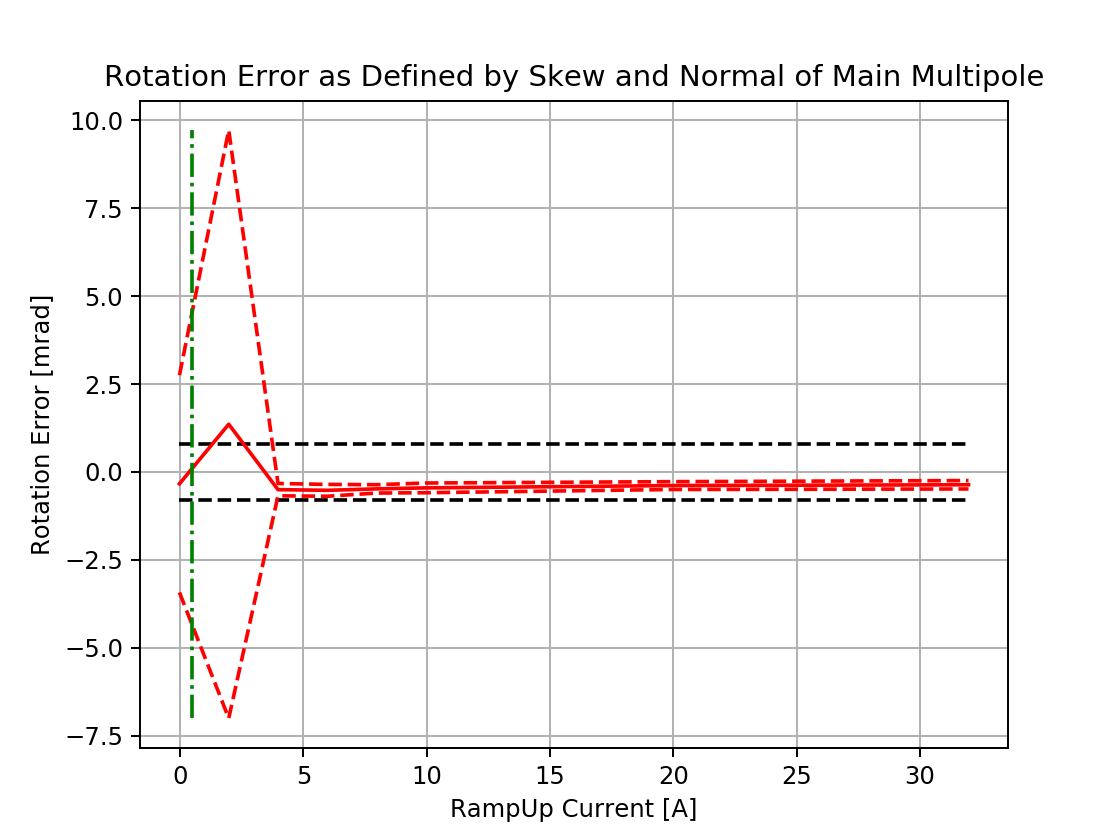

Currents for nominal strengths:
BO-Fam:MA-QD: 0.5 A


<IPython.core.display.Javascript object>


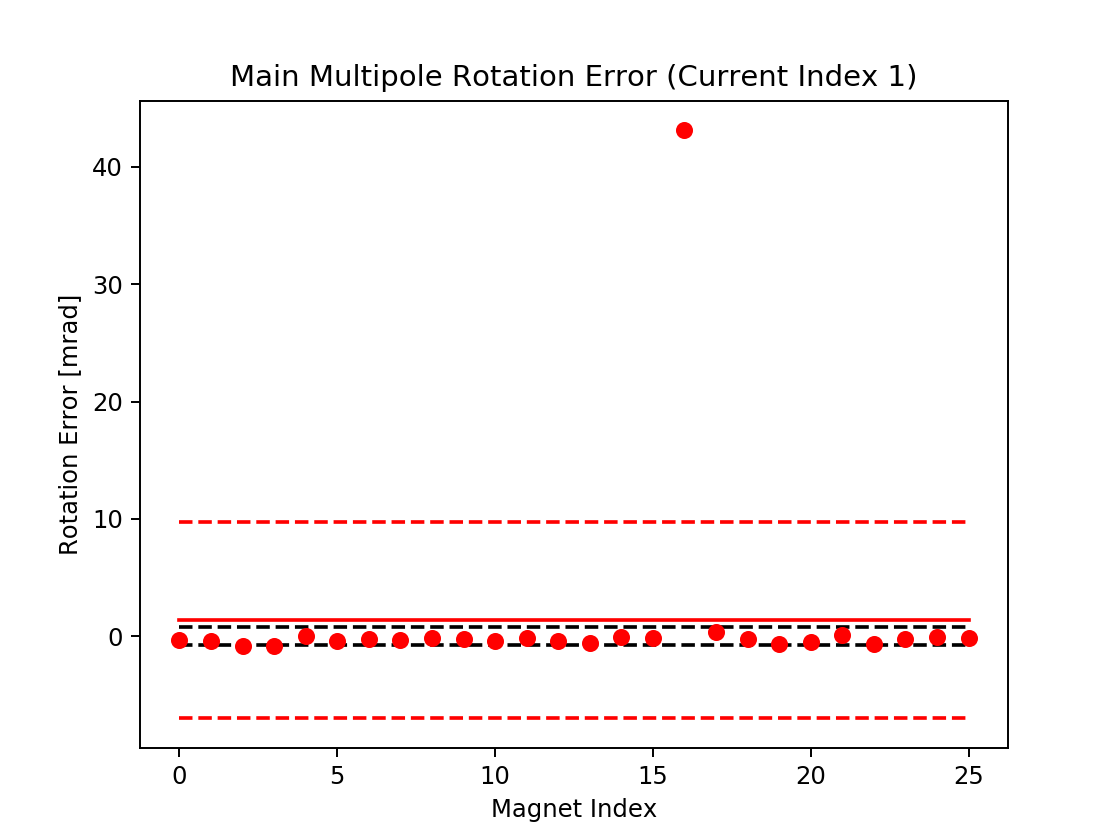

Angle error (Spec): +0.800 mrad
Angle error (Avg) : +1.358 mrad
Angle error (Std) : +8.360 mrad


<IPython.core.display.Javascript object>


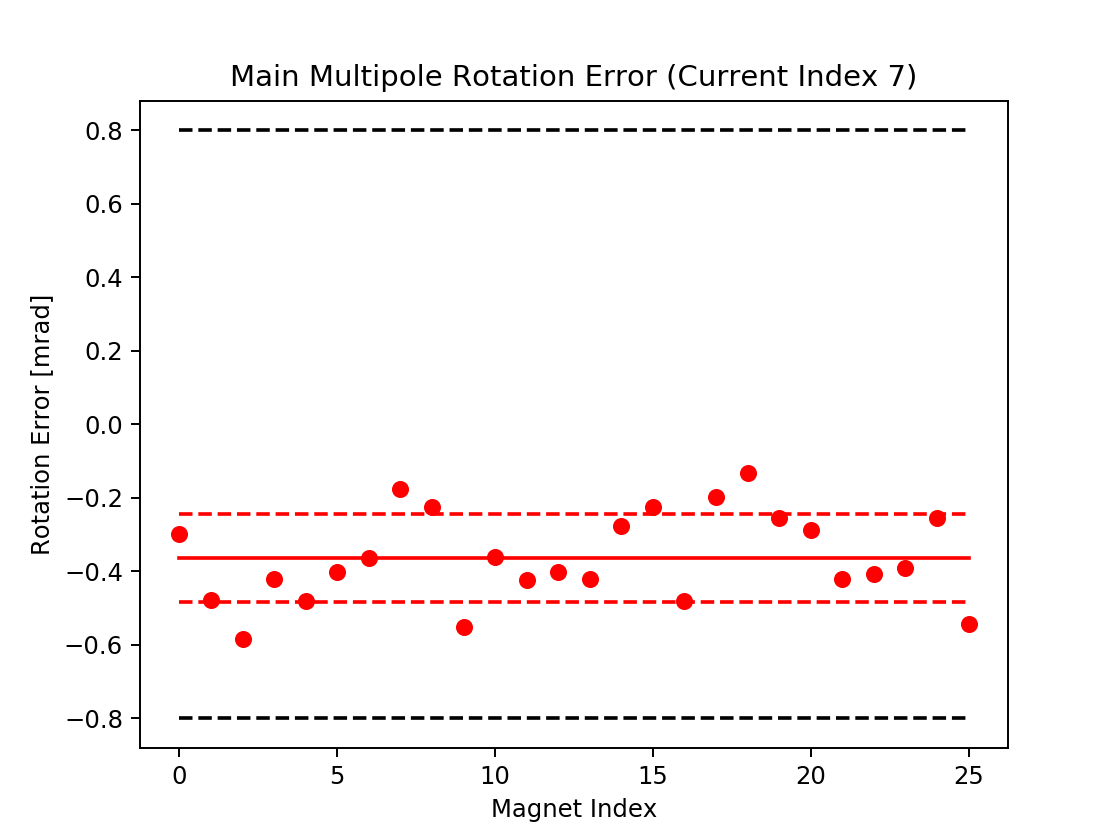

Angle error (Spec): +0.800 mrad
Angle error (Avg) : -0.364 mrad
Angle error (Std) : +0.120 mrad


In [7]:
plt.figure()
data.rotation_error_vs_current_plot('M1', 3.0, plt)
plt.show()

curr_idx = [1, 7]  
for i in curr_idx:
    plt.figure()
    spec, avg, std = data.rotation_error_plot('M1', plt, i)
    plt.show()
    print('Angle error (Spec): {:+.3f} mrad'.format(spec))
    print('Angle error (Avg) : {:+.3f} mrad'.format(avg))
    print('Angle error (Std) : {:+.3f} mrad'.format(std))

## Hysteresis

<IPython.core.display.Javascript object>


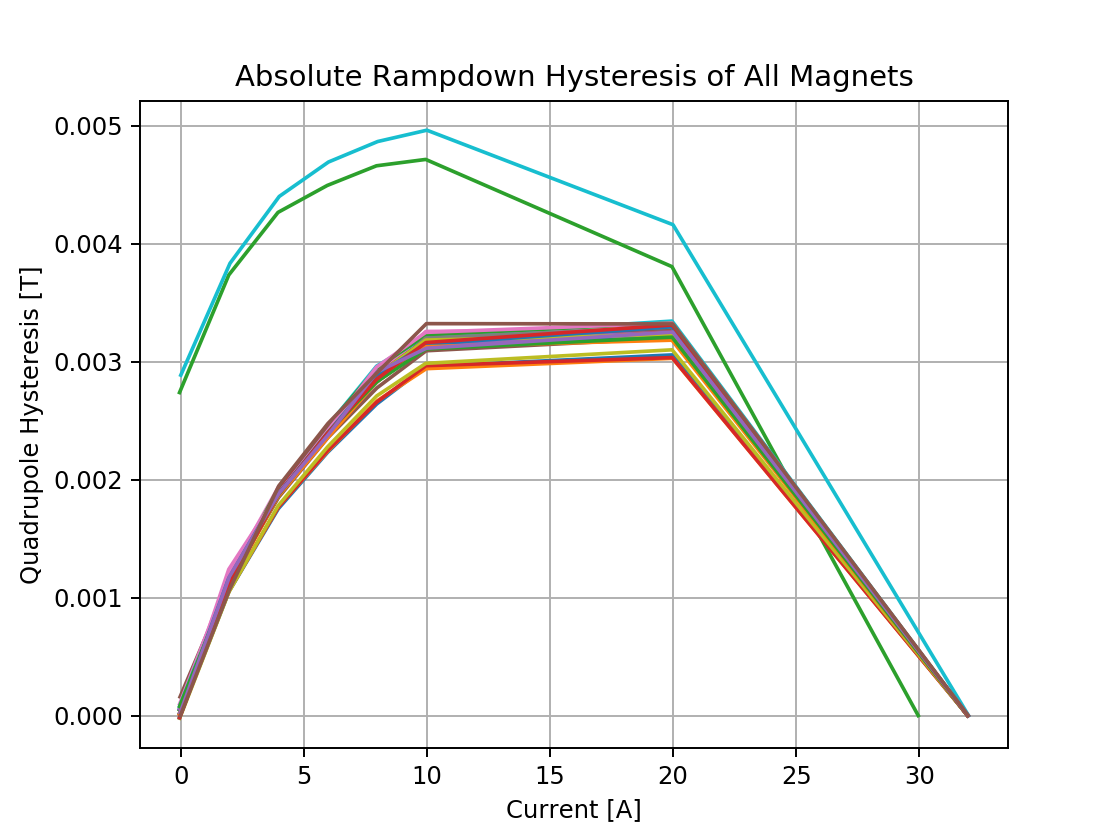

<IPython.core.display.Javascript object>


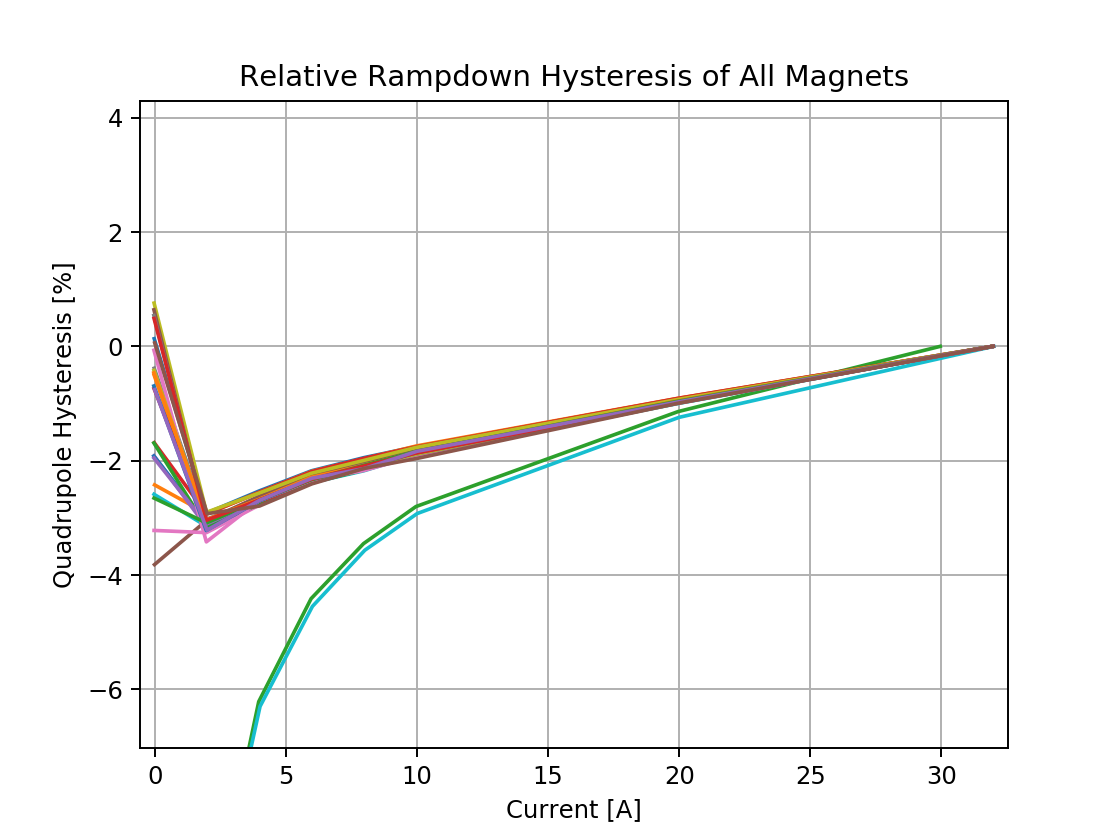

In [8]:
# Absolute
plt.figure()
data.hysteresis_absolute_plot('M1', plt)
plt.show()

# Relative
plt.figure()
data.hysteresis_relative_plot('M1', plt)
plt.show()

## Save Excitation Data Files

In [15]:
# save average excitation data to file

data.save_excdata_average('M1')

In [16]:
# save excitation data of all magnets to separate files
data.save_excdata_individuals('M1')

## Multipoles

<IPython.core.display.Javascript object>


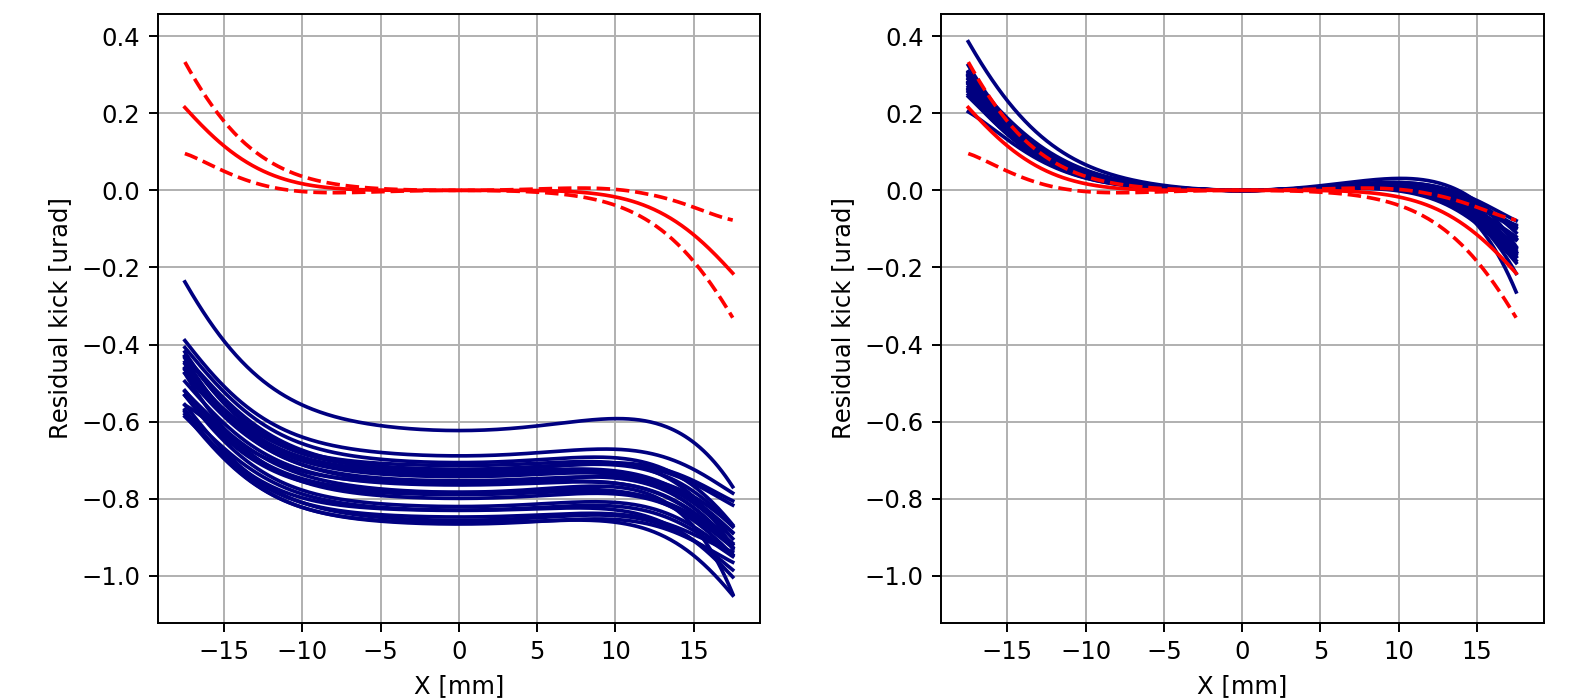

<IPython.core.display.Javascript object>


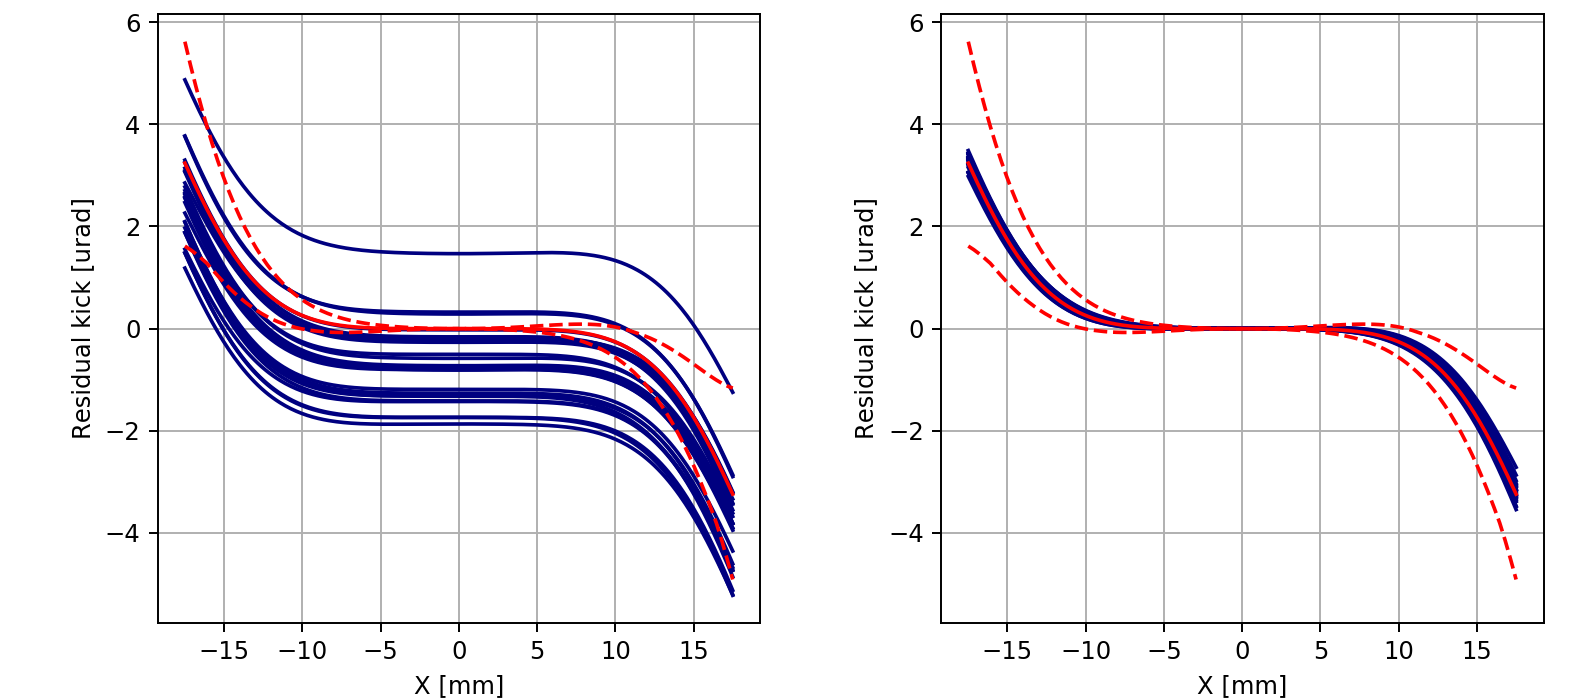

In [9]:
# Horizontal kick

curr_idx = [1, 7]
for i in curr_idx:
    plt.figure(figsize=(9,4))
    data.multipole_errors_kickx_plot('M1', plt, curr_idx=i, energy=3.0, 
                                     excluded_monomials_plot1=(2,),
                                     excluded_monomials_plot2=(1,2,))
    plt.show()

<IPython.core.display.Javascript object>


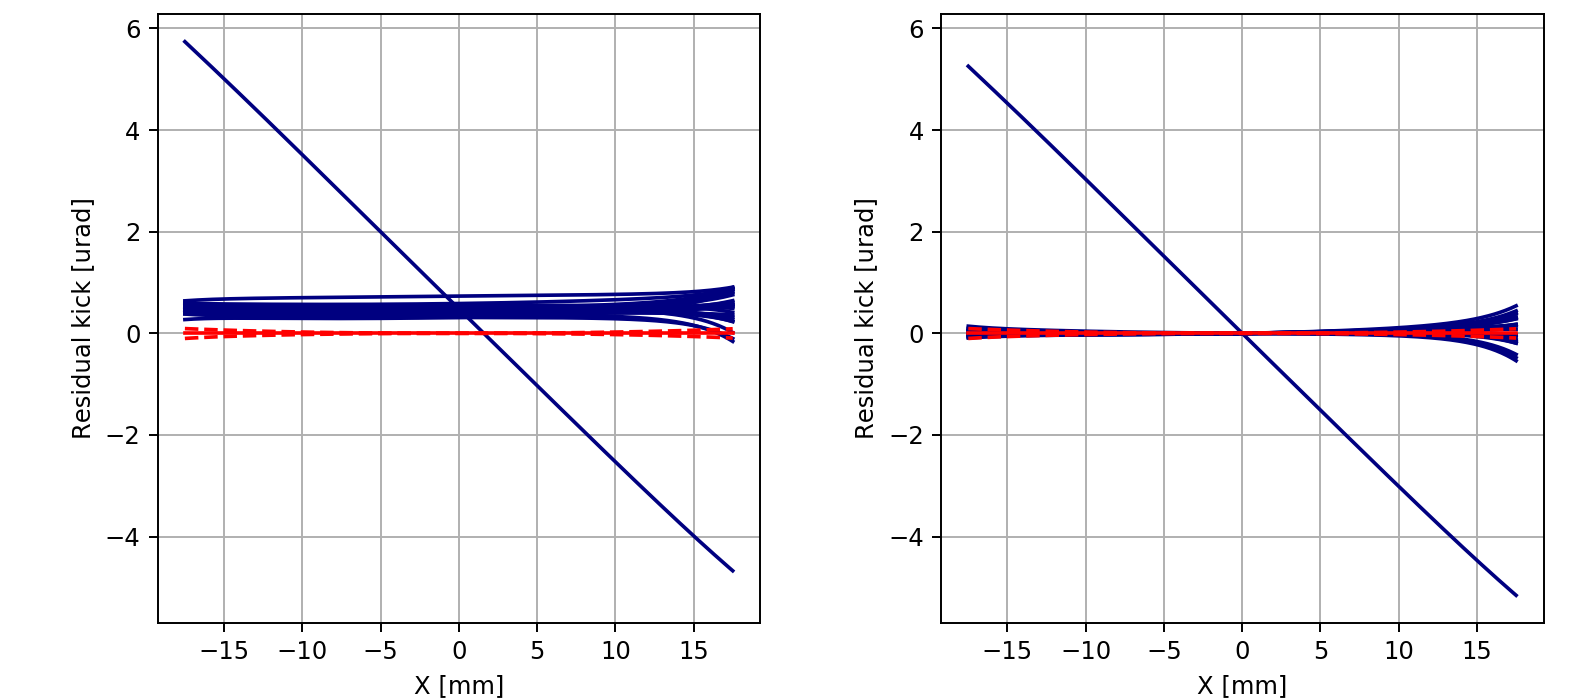

<IPython.core.display.Javascript object>


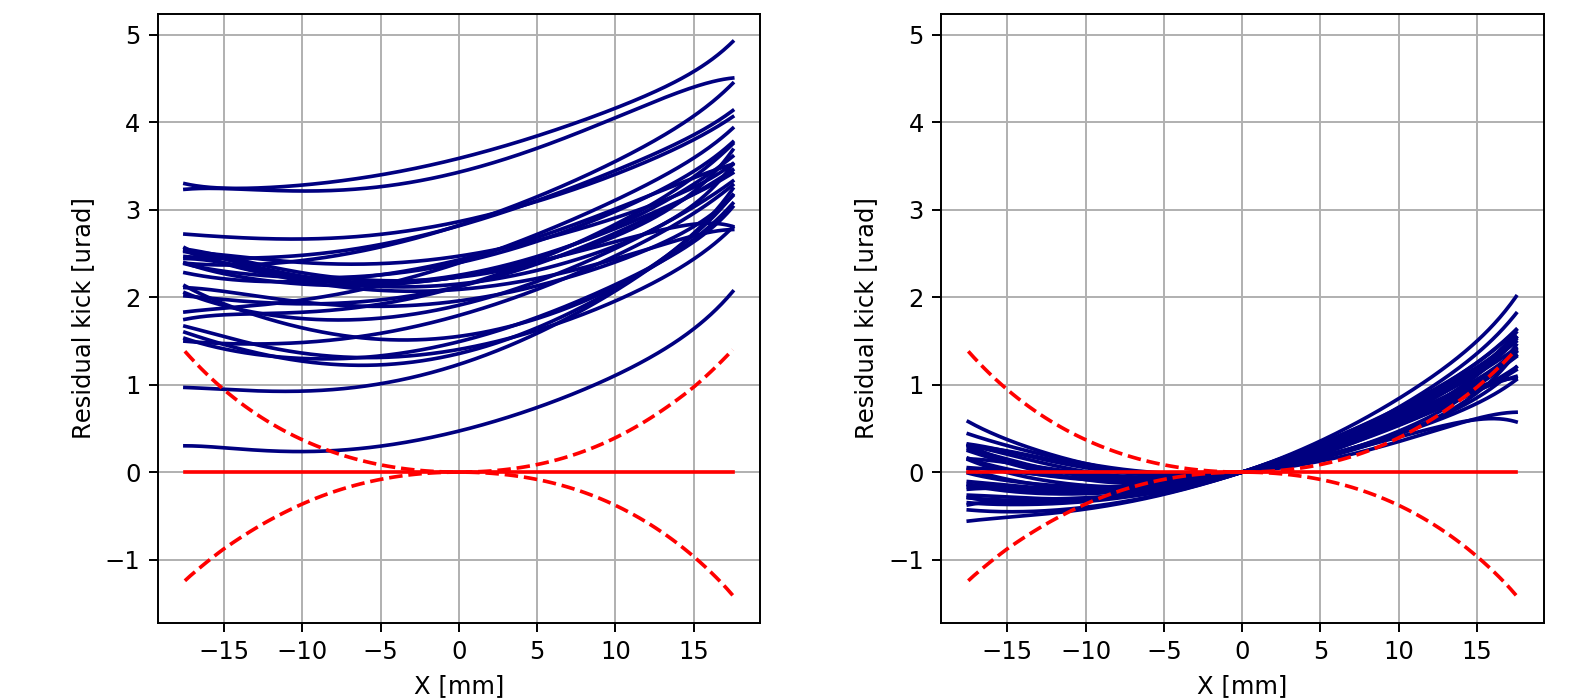

In [10]:
# Vertical kick

curr_idx = [1, 7]
for i in curr_idx:
    plt.figure(figsize=(9,4))
    data.multipole_errors_kicky_plot('M1', plt, curr_idx=i, energy=3.0, 
                                     excluded_monomials_plot1=(),
                                     excluded_monomials_plot2=(1,))
    plt.show()

# Magnets Sorting

In [11]:
med = 'M1'
print('Rampup')
c, gl = data.tmpl.get_rampup(med)
for i in range(len(c)):
    print('{:02d}: I = {:8.4f} A => GL = {:+.4f} T'.format(i, c[i], gl[i]))

Rampup
00: I =  -0.0284 A => GL = -0.0029 T
01: I =   1.9701 A => GL = -0.0351 T
02: I =   3.9682 A => GL = -0.0676 T
03: I =   5.9670 A => GL = -0.1002 T
04: I =   7.9674 A => GL = -0.1330 T
05: I =   9.9666 A => GL = -0.1659 T
06: I =  19.9674 A => GL = -0.3310 T
07: I =  31.9731 A => GL = -0.5294 T


In [12]:
# Print Multipoles Files

currents, _ = data.tmpl.get_rampup('M1')
stdout = sys.stdout
for cidx in range(1,len(currents)):
    sys.stdout = open('MULTIPOLES-{:.0f}A.txt'.format(currents[cidx]), 'w')
    data.readme_multipoles_print('M1', cidx)
    sys.stdout.flush()
sys.stdout = stdout